In [2]:
using Plots

In [3]:
mutable struct Vector
    x
    y
end

LoadError: cannot assign a value to variable Base.Vector from module Main

In [4]:
width = 16
height = 16
randMag() = (rand() * 2) -  1
m = Array{Vector,2}(undef, width, height)
for x ∈ 1:width
    for y ∈ 1:height
        m[x,y] = Vector(randMag(),randMag())
    end
end
num = length(m)
xs = []
ys = []
u = []
v = []
for x ∈ 1:width
    for y ∈ 1:height
        push!(u, m[x,y].x)
        push!(v, m[x,y].y)
        push!(xs, x)
        push!(ys, y)
    end
end
quiver(xs,ys,quiver=(u, v))

LoadError: MethodError: no method matching Array{T,1} where T(::Float64, ::Float64)

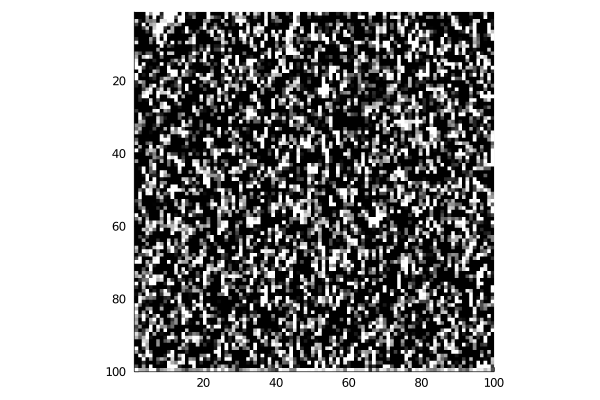

In [113]:
mOut = Array{Float64, 2}(undef, width, height)
mag(v::Vector) = sqrt(v.x^2 + v.y^2)
add(v::Vector, v′::Vector) = Vector(v.x + v′.x, v.y + v′.y)
dotVec(v::Vector, v′::Vector) = v.x * v′.x + v.y + v′.y
function inBounds(m,x,y)
    if x < 1 || y < 1 || x > width || y > height return false end
    return true
end
for x ∈ 1:width
    for y ∈ 1:height
        vec = m[x,y]
        if inBounds(m,x+1,y)
            mOut[x,y] = dotVec(m[x,y],m[x+1, y])
        else
            mOut[x,y] = mag(m[x,y])
        end
    end
end
plot(Gray.(mOut))